<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/3_DeepLearning/11-2_LSTM_%EC%A3%BC%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기(S&P)
- 스탠다드앤푸어 500 데이터세트
- 미국 주식 시장에서 거래되는 모든 S&P 자본 기업들에 대한 주식 가격

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dir = "/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/LSTM_Data/all_stocks_5yr.csv"
df = pd.read_csv(dir)
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


- open : 시작 가격
- high : 상한가
- low :  하한가
- close : 종가
- volume : 거래량

# 정렬, 트렌드 시각화
- 505개 주식 중 하나를 선택
- 데이터 프레임을 날짜로 정렬 : 시계열 예측하는 문제에서 시퀀스의 순서는 예측에 매우 중요한 영향을 미친다.
- 순차적으로 정렬된 데이터에서 상한가와 하한가를 플로팅해서 시각적으로 표시
- 조금의 차이는 있지만 상한가와 하한가 두 값 모두 동일한 패턴을 따르는 것을 확인할 수 있다.

In [ ]:
df[4000:4005]

,date,open,high,low,close,volume,Name
4000,2013-12-27,52.92,53.050,52.3800,52.55,2355008,ABBV
4001,2013-12-30,52.73,53.030,52.6000,53.01,2898886,ABBV
4002,2013-12-31,52.99,53.060,52.3600,52.81,3019731,ABBV
4003,2014-01-02,52.12,52.330,51.5200,51.98,4569061,ABBV
4004,2014-01-03,52.25,52.665,51.9675,52.30,4794591,ABBV


In [ ]:
abbv = df[df['Name'] == 'ABBV']
abbv

,date,open,high,low,close,volume,Name
3777,2013-02-08,36.37,36.420,35.825,36.25,13858795,ABBV
3778,2013-02-11,36.13,36.180,35.750,35.85,6031957,ABBV
3779,2013-02-12,35.77,35.900,35.200,35.42,7473991,ABBV
3780,2013-02-13,35.42,35.570,35.150,35.27,4860053,ABBV
3781,2013-02-14,35.05,36.730,35.010,36.57,7570052,ABBV
...,...,...,...,...,...,...,...
5031,2018-02-01,112.24,117.530,112.230,116.34,9943452,ABBV
5032,2018-02-02,115.50,117.930,114.920,115.17,7184413,ABBV
5033,2018-02-05,113.00,115.535,109.400,109.51,9827825,ABBV
5034,2018-02-06,104.91,113.520,101.000,111.20,14107829,ABBV


In [ ]:
len(set(df['Name']))

505

In [ ]:
aal = df[df['Name'] == 'AAL']
aal = aal.sort_values('date')
aal

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


Text(0, 0.5, 'Price')

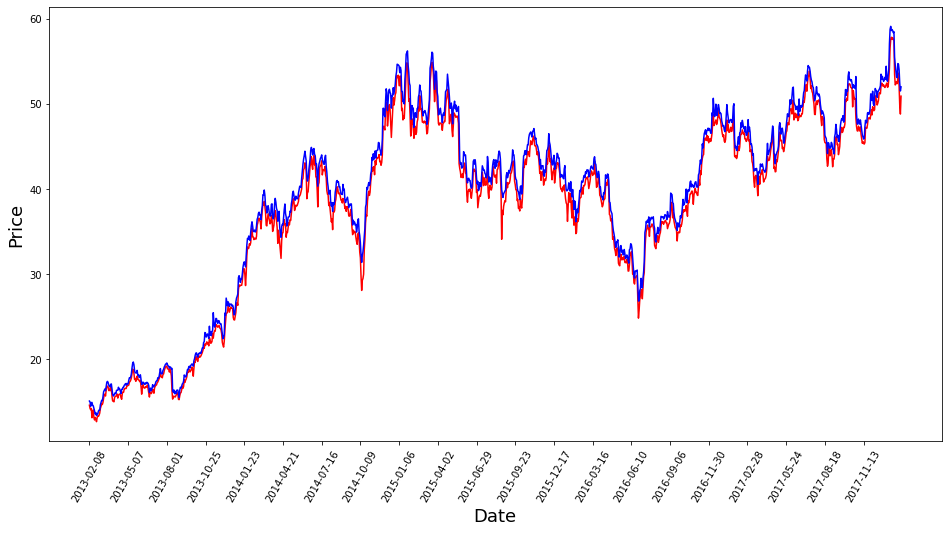

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(range(aal.shape[0]), (aal['low']), color='r')
plt.plot(range(aal.shape[0]), (aal['high']), color='b')
plt.xticks(range(0, aal.shape[0], 60), aal['date'].loc[::60], rotation=60)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)

# 데이터프레임을 텐서로 변환
- 두 변수의 연관성이 높으므로 두 변수를 모두 추적하지 않아도 예측 모델링을 하는 데 큰 어려움은 없을 것이다.
- 둘 중 한 변수를 선택해도 관계없지만, 두 변수의 평균값을 사용한다.
- 넘파이 ndarray 타입으로 변환한다.
- 총 1,259개의 관찰 결과가 존재함을 확인하고, 각 결과는 해당 날짜의 AAL 주식의 중간값에 해당한다.

In [ ]:
high_prices = aal.loc[:, 'high'].values
low_prices = aal.loc[:, 'low'].values
mid_prices = (high_prices+low_prices)/2.0
high_prices, low_prices, mid_prices

(array([15.12, 15.01, 14.51, ..., 52.39, 51.5 , 51.98]),
 array([14.63, 14.26, 14.1 , ..., 49.75, 48.79, 50.89]),
 array([14.875, 14.635, 14.305, ..., 51.07 , 50.145, 51.435]))

# 데이터 분할
- 테스트 데이터는 전처리된 중간 주식 가격 데이터에서 1000번째 이후로 정한다.
- train_test_split을 사용하면 shuffle되기 때문에 임의로 분할한다. 시계열 데이터는 시간 순서가 중요하기 때문에  train_test_split을 사용하지 않는다.

In [ ]:
train_data = mid_prices[:1000]
test_data = mid_prices[1000:]

In [ ]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

In [ ]:
print(f'{len(train_data)} training and {len(test_data)} total testing instances')

1000 training and 259 total testing instances


# 훈련, 테스트 인스턴스 플롯
- AAL 주식 데이터의 훈련 인스턴스와 테스트 인스턴스를 표준화하지 않은 상태로 플롯
- 스케일링 되어있지 않으며 훈련 데이터는 1000개, 테스트 데이터는 그 1/4 정도임을 확인
- 테스트 데이터는 관찰 수행 기간 동안 40 - 57달러 사이의 가격을 나타낸다.
- 훈련 데이터는 그보다 긴 기간동안 0달러에서 50달러 사이의 가격을 나타낸다.

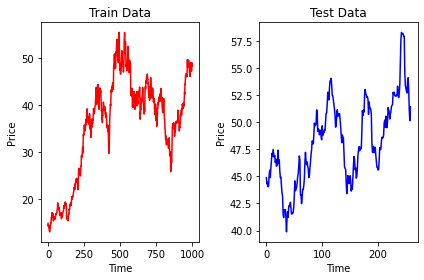

In [ ]:
plt.subplot(1,2,1)
plt.plot(range(train_data.shape[0]), train_data, color='r', label='Training split')
plt.title('Train Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend

plt.subplot(1,2,2)
plt.plot(range(test_data.shape[0]), test_data, color='b', label='Training split')
plt.title('Test Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend

plt.tight_layout()
plt.show()

# 윈도우 방식 표준화
- 0에서 1 사이의 값으로 스케일링
- 표준화는 다양한 머신러닝, 딥러닝에서 일반적으로 사용한다.
- 네트워크는 표준화된 값을 사용해 관련된 표현을 더 잘 잡아낸다는 것을 기억
- 시계열 문제에서는 조금 다른 표준화 전략이 필요(윈도우 표준화)
- 윈도우 표준화 방식을 사용하면 데이터 전체를 한 번에 표준화하는 대신 작은 배치 단위로 표준화할 수 있다.
- ANN이 가장 효과적으로 다루는 값의 범위가 0에서 1 사이의 값이다.
- 윈도우 표준화 단점
  - 배치 단위로 표준화를 수행하면 배치별로 독립적인 표준화가 수행되므로 각 배치 끝에서 지속성이 단절된다. 
  - 윈도우 크기를 적절하게 선택해야 한다.


In [ ]:
normalization_window = 250
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
for i in range(0, 1000, normalization_window) :
  scaler.fit(train_data[i:i+normalization_window, :])
  train_data[i:i+normalization_window, :] = scaler.transform(train_data[i:i+normalization_window, :])

In [ ]:
test_data = scaler.fit_transform(test_data)

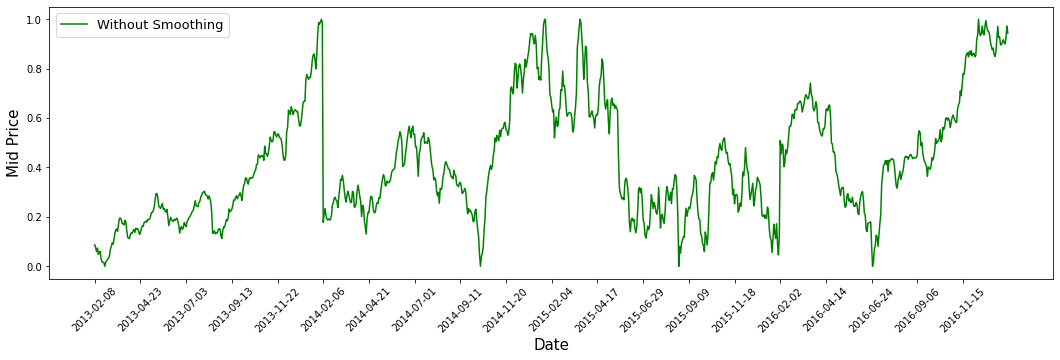

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(range(train_data.shape[0]), train_data, color='g', label='Without Smoothing')
plt.xticks(range(0, aal.shape[0]-len(test_data), 50), aal['date'][::50], rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Mid Price', fontsize=15)
plt.legend(fontsize=13)
plt.show()

# 데이터 노이즈 제거
- 지수 평활법(exponential smoothing)
  - 기하급수적으로 감소하는 방식으로 데이터 포인트에 가중치를 부여
  - 최근의 이벤트가 먼 과거의 이벤트보다 현재 데이터 포인트에 더 많은 영향을 주도록 각 데이터 포인트를 현재 값과 시계열에서 이전 값들의 재귀적 가중치 함수로 표현
- 중간값 데이터 전체를 대상으로 루프를 돌면서 평활화 계수를 업데이트해서 현재 가격값에 적용

In [ ]:
Smoothing = 0.0
gamma = 0.1
for i in range(1000) :
  Smoothing = gamma * train_data[i] + (1 - gamma) * Smoothing
  train_data[i] = Smoothing

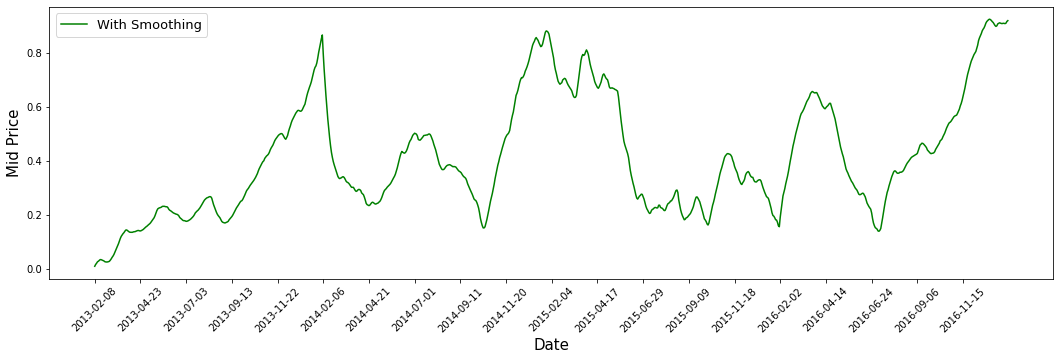

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(range(train_data.shape[0]), train_data, color='g', label='With Smoothing')
plt.xticks(range(0, aal.shape[0]-len(test_data), 50), aal['date'][::50], rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Mid Price', fontsize=15)
plt.legend(fontsize=13)
plt.show()

# 베이스라인 모델
- 단순 이동 평균(simple moving average) 
  - 시계열 시퀀스의 다음 값을 예측할 때 주어진 윈도우에 포함된 이전 관찰값에는 모두 동일한 가중치를 적용
- 지수 이동 평균(exponential moving average)
  - 미래 데이터를 예측할 때 과거 데이터 포인트가 영향을 주는 정도를 제어할 수 있다.

## 단순 이동 평균

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
window_size         = 26
N                   = train_data.size
std_avg_predictions = list()
mse_errors          = list()

In [ ]:
for i in range(window_size, N) :
  std_avg_predictions.append( np.mean( train_data[ i-window_size : i ] ) )
  mse_errors.append( (std_avg_predictions[-1] - train_data[i]) ** 2 )
print('MSE error for standard averaging : %.5f'%(0.5 * np.mean( mse_errors )))

MSE error for standard averaging : 0.00444


In [ ]:
print('No. of obs :',         len(train_data))
print('Std av. prediction :', len(std_avg_predictions))

No. of obs : 1000
Std av. prediction : 974


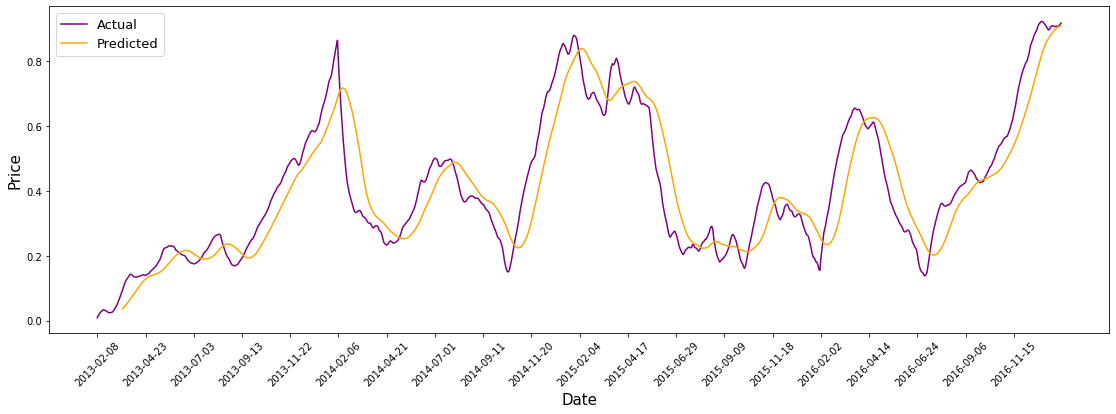

In [ ]:
plt.figure(figsize=(19,6))
plt.plot(range(train_data.shape[0]), train_data, color='purple', label='Actual')
plt.plot(range(window_size, N), std_avg_predictions, color='orange', label='Predicted')
plt.xticks(range(0, aal.shape[0] - len(test_data), 50), aal['date'][::50], rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend(fontsize=13)
plt.show()

## 지수 이동 평균

In [ ]:
ema_avg_predictions = list()
mse_errors          = list()
EMA                 = 0.0
ema_avg_predictions.append( EMA )
gamma               = 0.5
window_size         = 100
N                   = len(train_data)

In [ ]:
for i in range(1, N) :
  EMA = EMA * gamma + (1.0 - gamma) * train_data[ i-1 ]
  ema_avg_predictions.append(EMA)
  mse_errors.append( ( ema_avg_predictions[-1] - train_data[i] ) ** 2 )

print('MSE error for EMA averaging : %.5f'%( 0.5 * np.mean( mse_errors ) ))
# MSE error for standard averaging : 0.00444

MSE error for EMA averaging : 0.00018


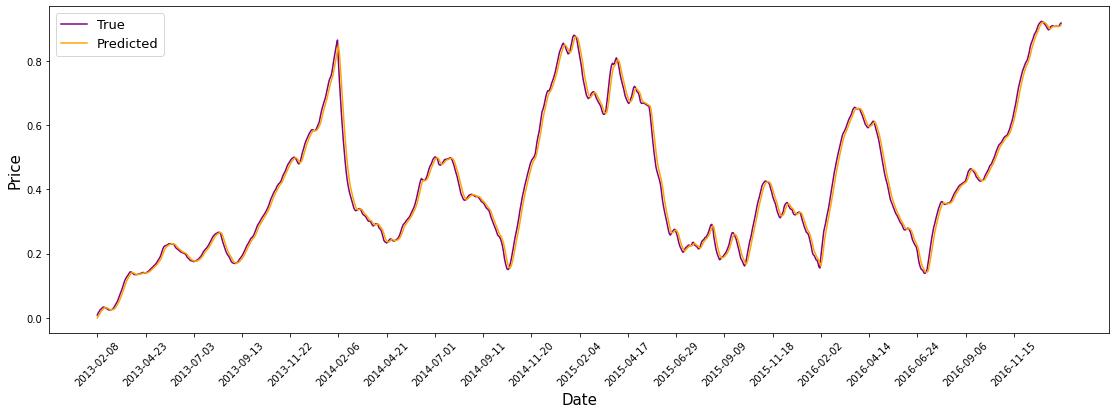

In [ ]:
plt.figure(figsize=(19,6))
plt.plot(range(train_data.shape[0]), train_data, color='purple', label='True')
plt.plot(range(0, N), ema_avg_predictions, color='orange', label='Predicted')
plt.xticks(range(0, aal.shape[0] - len(test_data), 50), aal['date'][::50], rotation=45)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend(fontsize=13)
plt.show()

# 관찰값 시퀀스 생성
- 시계열 주가를 입력 받아 해당 데이터를 주어진 시퀀스에서 n개의 연속된 값을 갖는 세그먼트로 만든다. 4타임스텝 이후의 주가를 지정한다.
- look_back
  - 관측 값에서 유지해야 할 주가의 수
  - 네트워크가 실제로 지난 7개의 주가를 돌아보도록 설정

In [ ]:
def create_dataset(dataset, look_back=7, foresight=3) :
  X, y = [], []

  for i in range(len(dataset) - look_back - foresight) :
    obs = dataset[i : (i+look_back), 0]
    X.append(obs)
    y.append(dataset[i+(look_back+foresight), 0])
    
  return np.array(X), np.array(y)

In [ ]:
look_back, foresight = 7, 3
X_train, y_train     = create_dataset(train_data, look_back, foresight)
X_test, y_test       = create_dataset(test_data,  look_back, foresight)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((990, 7), (990,), (249, 7), (249,))

# 데이터 shape 정리
- 3차원 텐서(타입스텝, 1, 특징)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test  = np.reshape(X_test,  (X_test.shape[0],  1, X_test.shape[1] ))
X_train.shape, X_test.shape

((990, 1, 7), (249, 1, 7))

In [ ]:
X_train[0]

array([[0.00867591, 0.015337  , 0.01975454, 0.02511656, 0.02738502,
        0.03043046, 0.03341036]])

In [ ]:
y_train[0]

0.028595272260547346

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
def feed_forward() :
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  return model

In [ ]:
def conv1D_net() :
  model = Sequential()
  model.add(Conv1D(32, 1, activation='relu', input_shape=(1,7)))
  model.add(MaxPooling1D(1))
  model.add(Flatten())
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  return model

In [ ]:
def simple_gru() :
  model = Sequential()
  model.add(GRU(32, input_shape=(1,7), dropout=0.1, recurrent_dropout=0.1))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam', metrics=['mean_absolute_error'])
  return model

In [ ]:
def conv1D_gru_net() :
  model = Sequential()
  model.add(Conv1D(32, 1, activation='relu', input_shape=(1,7)))
  model.add(MaxPooling1D(1))
  model.add(Conv1D(32, 1, activation='relu'))
  model.add(GRU(32, dropout=0.1, recurrent_dropout=0.2))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  return model

In [ ]:
def simple_lstm() :
  model = Sequential()
  model.add(LSTM(32, input_shape=(1, 7)))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  return model

In [ ]:
def lstm_stacked() :
  model = Sequential()
  model.add(LSTM(16, input_shape=(1,7), dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
  model.add(LSTM(16, dropout=0.1, recurrent_dropout=0.2))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  return model

In [ ]:
def lstm_stateful() :
  model = Sequential()
  model.add(LSTM(32, batch_input_shape=(1,1,7), stateful=True, dropout=0.1, recurrent_dropout=0.1))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  return model

In [ ]:
def plot_predictions(model, y_test=y_test) :
  preds = model.predict(X_test)
  plt.figure(figsize=(16,8))
  plt.plot(scaler.inverse_transform(preds.reshape(-1, 1)), label='generated', color='r')
  plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual', color='g')
  plt.legend()
  plt.show()

In [ ]:
def plot_losses(network) :
  plt.plot(network.history['loss'], label='loss')
  plt.plot(network.history['val_loss'], label='val loss')
  plt.legend()
  plt.show()

In [ ]:
def train_network(list, X_train, y_train, epochs=5) :
  for net in list :
    network_name = str(net).split(' ')[1]
    filepath = network_name + '_epoch-{epoch:02d}-loss-{loss:.4f}-.hdf5'
    print('Training :', network_name)

    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, save_best_only=True, mode='min')
    callbacks_list = [checkpoint]
    model = net()
    network = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=callbacks_list)
    model.summary()
    plot_predictions(model, y_test)
  return network, model

Training : feed_forward
Epoch 1/50
16/16 [==============================] - 0s 19ms/step - loss: 0.1649 - val_loss: 0.1085
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0622 - val_loss: 0.0975
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0503 - val_loss: 0.0926
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0452 - val_loss: 0.0946
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0456 - val_loss: 0.0919
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0428 - val_loss: 0.0908
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0415 - val_loss: 0.0894
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0877
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0863
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0379 - val_loss: 0

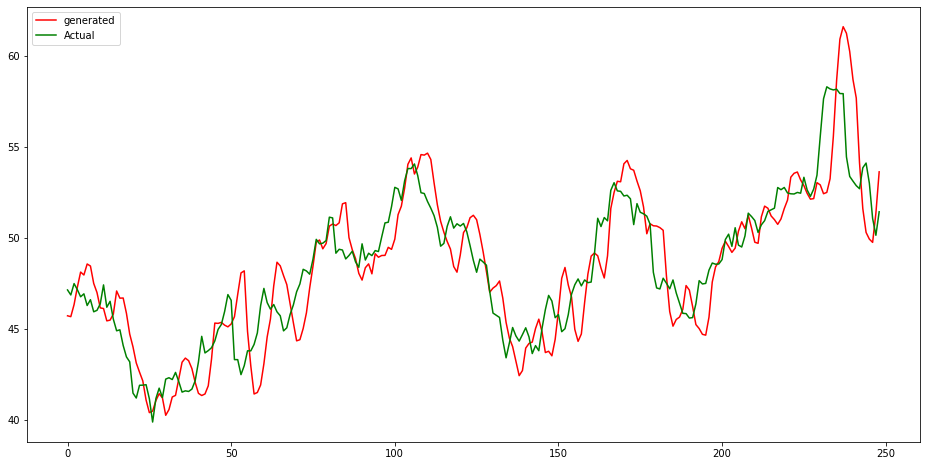

(<tensorflow.python.keras.callbacks.History at 0x7fe8cd29afd0>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x7fe953ff6cf8>)

In [ ]:
networks = [feed_forward]
train_network(networks, X_train, y_train, epochs=50)

Training : simple_gru
Epoch 1/50
16/16 [==============================] - 1s 33ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - val_loss: 0.1704 - val_mean_absolute_error: 0.1704
Epoch 2/50
16/16 [==============================] - 0s 12ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - val_loss: 0.1085 - val_mean_absolute_error: 0.1085
Epoch 3/50
16/16 [==============================] - 0s 12ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - val_loss: 0.1029 - val_mean_absolute_error: 0.1029
Epoch 4/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - val_loss: 0.0994 - val_mean_absolute_error: 0.0994
Epoch 5/50
16/16 [==============================] - 0s 12ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - val_loss: 0.0995 - val_mean_absolute_error: 0.0995
Epoch 6/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - val_loss: 0.0987 - val_mean_absolute_error: 0.0987


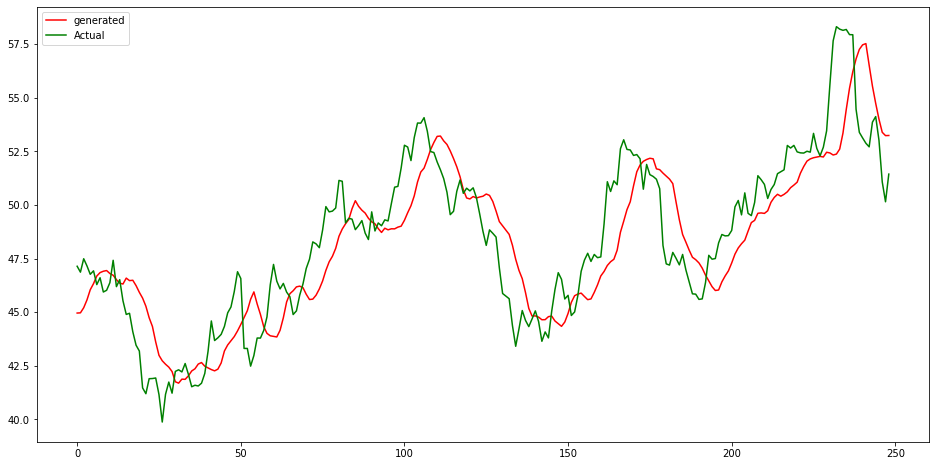

(<tensorflow.python.keras.callbacks.History at 0x7fe8c9f20f60>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x7fe8ca014ba8>)

In [ ]:
networks = [simple_gru]
train_network(networks, X_train, y_train, epochs=50)

Training : lstm_stacked
Epoch 1/50
16/16 [==============================] - 1s 53ms/step - loss: 0.3818 - val_loss: 0.3833
Epoch 2/50
16/16 [==============================] - 0s 22ms/step - loss: 0.3063 - val_loss: 0.2926
Epoch 3/50
16/16 [==============================] - 0s 20ms/step - loss: 0.2032 - val_loss: 0.1718
Epoch 4/50
16/16 [==============================] - 0s 22ms/step - loss: 0.1043 - val_loss: 0.0975
Epoch 5/50
16/16 [==============================] - 0s 20ms/step - loss: 0.0835 - val_loss: 0.0963
Epoch 6/50
16/16 [==============================] - 0s 22ms/step - loss: 0.0798 - val_loss: 0.0968
Epoch 7/50
16/16 [==============================] - 0s 20ms/step - loss: 0.0723 - val_loss: 0.0964
Epoch 8/50
16/16 [==============================] - 0s 19ms/step - loss: 0.0674 - val_loss: 0.0971
Epoch 9/50
16/16 [==============================] - 0s 22ms/step - loss: 0.0644 - val_loss: 0.0973
Epoch 10/50
16/16 [==============================] - 0s 20ms/step - loss: 0.0614 - va

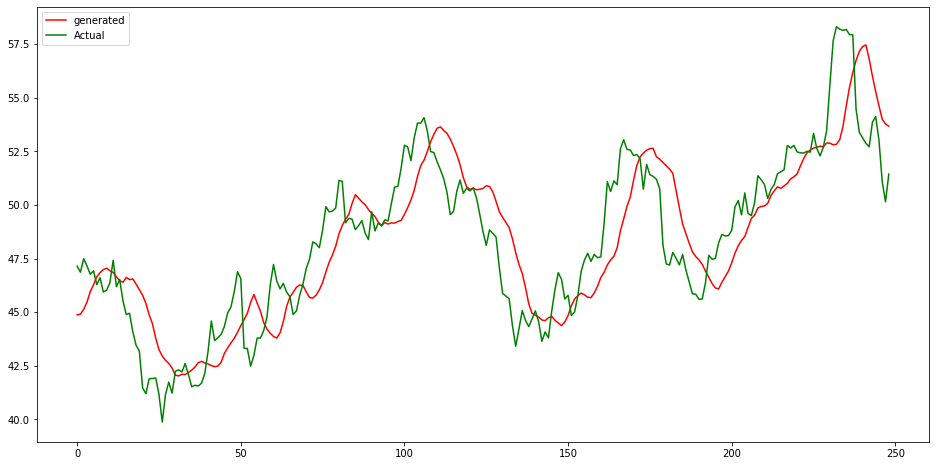

(<tensorflow.python.keras.callbacks.History at 0x7fe8c7f6bd68>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x7fe8c91d3518>)

In [ ]:
networks = [lstm_stacked]
train_network(networks, X_train, y_train, epochs=50)

Training : conv1D_gru_net
Epoch 1/50
16/16 [==============================] - 1s 40ms/step - loss: 0.2982 - val_loss: 0.1747
Epoch 2/50
16/16 [==============================] - 0s 14ms/step - loss: 0.1065 - val_loss: 0.1073
Epoch 3/50
16/16 [==============================] - 0s 13ms/step - loss: 0.0936 - val_loss: 0.1065
Epoch 4/50
16/16 [==============================] - 0s 14ms/step - loss: 0.0763 - val_loss: 0.0971
Epoch 5/50
16/16 [==============================] - 0s 16ms/step - loss: 0.0590 - val_loss: 0.0917
Epoch 6/50
16/16 [==============================] - 0s 15ms/step - loss: 0.0524 - val_loss: 0.0882
Epoch 7/50
16/16 [==============================] - 0s 14ms/step - loss: 0.0470 - val_loss: 0.0837
Epoch 8/50
16/16 [==============================] - 0s 13ms/step - loss: 0.0442 - val_loss: 0.0847
Epoch 9/50
16/16 [==============================] - 0s 12ms/step - loss: 0.0405 - val_loss: 0.0804
Epoch 10/50
16/16 [==============================] - 0s 12ms/step - loss: 0.0402 - 

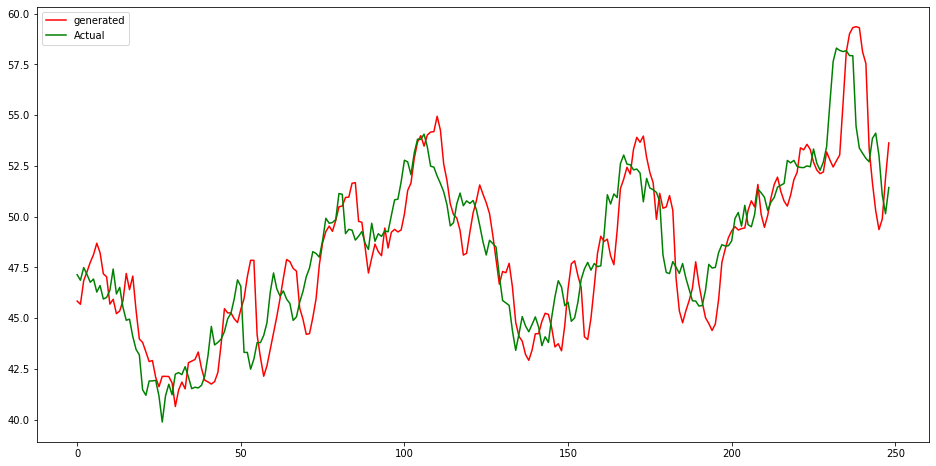

(<tensorflow.python.keras.callbacks.History at 0x7fe8c5c6c518>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x7fe8c5d51b00>)

In [ ]:
networks = [conv1D_gru_net]
train_network(networks, X_train, y_train, epochs=50)

Training : lstm_stateful
Epoch 1/50
16/16 [==============================] - 0s 26ms/step - loss: 0.2816 - val_loss: 0.1762
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.2033 - val_loss: 0.2223
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.1914 - val_loss: 0.1859
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.1757 - val_loss: 0.1789
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1774 - val_loss: 0.1838
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1936 - val_loss: 0.2365
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1788 - val_loss: 0.1714
Epoch 8/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1897 - val_loss: 0.2421
Epoch 9/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1836 - val_loss: 0.1733
Epoch 10/50
16/16 [==============================] - 0s 7ms/step - loss: 0.1771 - val_loss: 

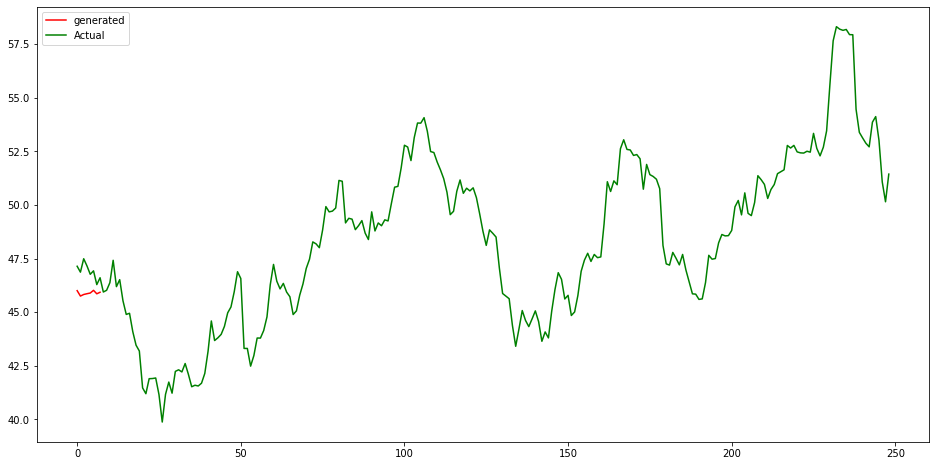

(<tensorflow.python.keras.callbacks.History at 0x7fe8c3dac6d8>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x7fe8c3e919e8>)

In [ ]:
networks = [lstm_stateful]
train_network(networks, X_train, y_train, epochs=50)

Training : conv1D_net
Epoch 1/50
16/16 [==============================] - 0s 11ms/step - loss: 0.2626 - val_loss: 0.1650
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0797 - val_loss: 0.1112
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0650 - val_loss: 0.1071
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0590 - val_loss: 0.1065
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0562 - val_loss: 0.1064
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0547 - val_loss: 0.1062
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0531 - val_loss: 0.1059
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0522 - val_loss: 0.1054
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0514 - val_loss: 0.1047
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0504 - val_loss: 0.1

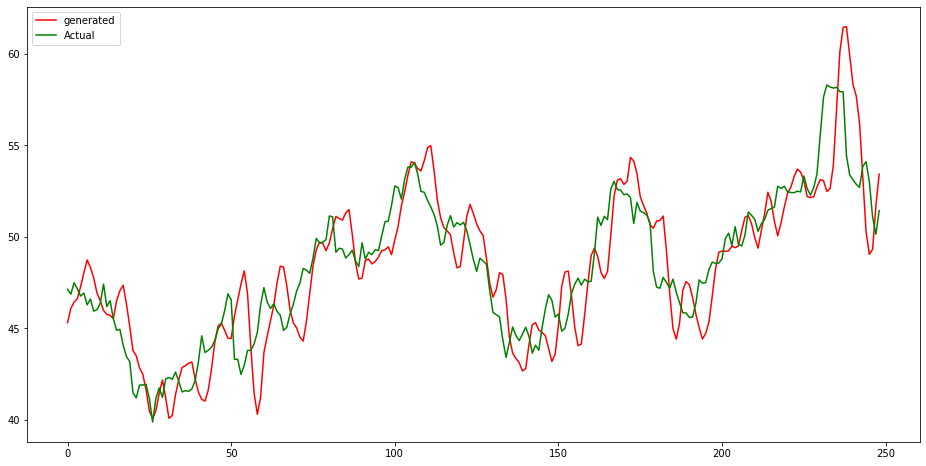

(<tensorflow.python.keras.callbacks.History at 0x7fe8c305b518>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x7fe8c5d34b00>)

In [ ]:
networks = [conv1D_net]
train_network(networks, X_train, y_train, epochs=50)

# 데이터 불러오기(아마존 주식)
- 아마존 주식 가격의 성과를 분석하기 위해 Gs 주식의 2000-06-06에서 2018-06-05까지의 [주가에 관한 데이터](https://finance.yahoo.com/quote/AMZN/history)를 사용


In [ ]:
dir = '/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/LSTM_Data/AMZN.csv'
Data = pd.read_csv(dir, header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')
Data

,Close
Date,
2000-11-21,24.250000
2000-11-22,25.187500
2000-11-24,28.937500
2000-11-27,28.000000
2000-11-28,25.031200
...,...
2018-11-15,1619.439941
2018-11-16,1593.410034
2018-11-19,1512.290039


# EDA
- describe() 함수를 통해서 아마존의 주가가 눈에 띄는 변화를 보였다는 것을 확인
- 최소값은 5.97달러, 최대값은 2039.51달러, 높은 표준편차를 보여준다(변동성이 크다).

In [ ]:
print(Data.info())
print("--------------------------------------------------------")
print(Data.head())
print("--------------------------------------------------------")
print(Data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2000-11-21 to 2018-11-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4529 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB
None
--------------------------------------------------------
              Close
Date               
2000-11-21  24.2500
2000-11-22  25.1875
2000-11-24  28.9375
2000-11-27  28.0000
2000-11-28  25.0312
--------------------------------------------------------
             Close
count  4529.000000
mean    290.353723
std     407.211585
min       5.970000
25%      39.849998
50%     117.889999
75%     327.440002
max    2039.510010


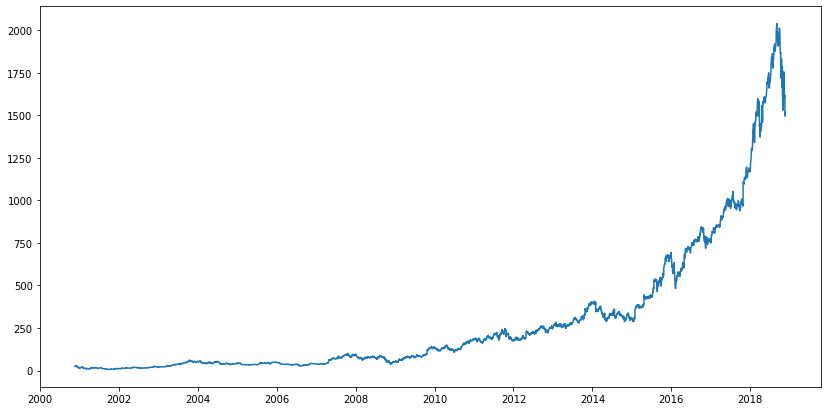

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(Data)
plt.show()

- pct_change() : 주어진 기간 동안 백분율 변화를 구하는 함수
- 로그 계산 
  - 로그 함수는 너무 커서 다루기 힘든 숫자를 작게 축소하여 모형을 만드는 기능을 한다.
  - 로그 함수에 수박을 넣으면 콩알이 튀어나온다. 또는 콩알만한 수박이 튀어나오는 함수라고 보면 된다.
- 로그 정규성 : 데이터가 로그 정규 분포라면 log(1 + r)도 쉽게 정규 분포다.
- 근사 로그 동등성 : 데이터가 매우 작으면 log(1 + r)은 대략 r과 같다.

In [ ]:
DataPCh    = Data.pct_change()
LogReturns = np.log(1+DataPCh)
print(LogReturns)

               Close
Date                
2000-11-21       NaN
2000-11-22  0.037931
2000-11-24  0.138790
2000-11-27 -0.032934
2000-11-28 -0.112081
...              ...
2018-11-15  0.012696
2018-11-16 -0.016204
2018-11-19 -0.052251
2018-11-20 -0.011191
2018-11-21  0.014123

[4529 rows x 1 columns]


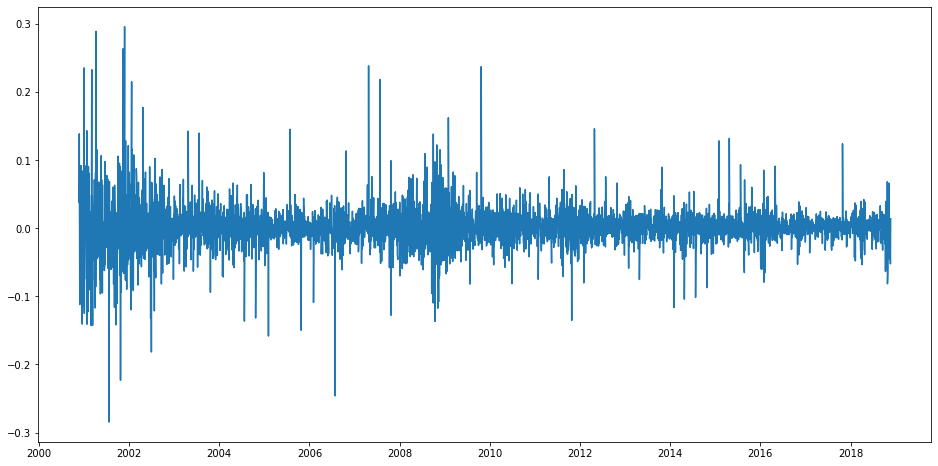

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(LogReturns)
plt.show()

# 데이터 Scaling

In [ ]:
scaler     = MinMaxScaler()
DataScaled = scaler.fit_transform(Data)

# 데이터 분할

In [ ]:
TrainLen  = int(len(DataScaled) * 0.70)
TestLen   = len(DataScaled) - TrainLen
TrainData = DataScaled[:TrainLen, :]
TestData  = DataScaled[TrainLen:len(DataScaled), :]
len(TrainData), len(TestData)

(3170, 1359)

- 시간 t에 저장된 값으로 시간 t + 1에서의 아마존 주가를 예측한다고 가정한다.
- 데이터세트 및 시간 단계를 입력으로 받고, 입력 및 출력을 반환하는 함수를 정의
- 이 함수에서 dataX = input = data(t)는 입력변수이고, DataY = ouput = data(t+1)은 다음 기간의 예측값이다.

In [ ]:
def DataSetCreation(dataset, TimeStep=1) :
  DataX, DataY = [], []
  for i in range(len(dataset) - TimeStep - 1) :
    a = dataset[i : (i+TimeStep), 0]
    DataX.append(a)
    DataY.append(dataset[i+TimeStep, 0])
  return np.array(DataX), np.array(DataY)

In [ ]:
TimeStep       = 1
TrainX, TrainY = DataSetCreation(TrainData, TimeStep)
TestX,  TestY  = DataSetCreation(TestData, TimeStep)

# LSTM 레이어
- LSTM 레이어에 대한 입력에는 다음 정보가 포함되어야 한다.
  - 관측　　 : 수집된 관측값 수
  - 시간단계 : 시간단계는 샘플의 관측 지정
  - 특징　　 : 각 단계마다의 특징 수

In [ ]:
TrainX = np.reshape(TrainX, (TrainX.shape[0], 1, TrainX.shape[1]))
TestX = np.reshape(TestX, (TestX.shape[0], 1, TestX.shape[1]))
TrainX.shape, TestX.shape

((3168, 1, 1), (1357, 1, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow import random

In [ ]:
random.set_seed(3)

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, TimeStep)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
# epochs     : 모델을 훈련시키는 세대의 수, 세대는 제공된 전체 x 및 y 데이터로 훈련을 반복하는 횟수
# batch_size : 그래디언트 업데이트 당 샘플 수
# verbose    : 0, 1, 2의 값을 가진다. 학습과정 출력 여부(0은 출력안함, 1은 진행바, 2는 세대 당 한 줄)
model.fit(TrainX, TrainY, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
3168/3168 [==============================] - 10s 3ms/step - loss: 5.6641e-05 - accuracy: 3.1566e-04
Epoch 2/10
3168/3168 [==============================] - 10s 3ms/step - loss: 5.6273e-06 - accuracy: 3.1566e-04
Epoch 3/10
3168/3168 [==============================] - 10s 3ms/step - loss: 5.9525e-06 - accuracy: 3.1566e-04
Epoch 4/10
3168/3168 [==============================] - 10s 3ms/step - loss: 5.0058e-06 - accuracy: 3.1566e-04
Epoch 5/10
3168/3168 [==============================] - 10s 3ms/step - loss: 5.2685e-06 - accuracy: 3.1566e-04
Epoch 6/10
3168/3168 [==============================] - 10s 3ms/step - loss: 4.4841e-06 - accuracy: 3.1566e-04
Epoch 7/10
3168/3168 [==============================] - 10s 3ms/step - loss: 4.4535e-06 - accuracy: 3.1566e-04
Epoch 8/10
3168/3168 [==============================] - 10s 3ms/step - loss: 4.3717e-06 - accuracy: 3.1566e-04
Epoch 9/10
3168/3168 [==============================] - 10s 3ms/step - loss: 4.1469e-06 - accuracy: 3.1566e-04
E

In [ ]:
score = model.evaluate(TrainX, TrainY, verbose=0)
print('Keras Model Loss :', score[0])
print('Keras Model Accuracy :', score[1])

Keras Model Loss : 2.014995516219642e-06
Keras Model Accuracy : 0.00031565656536258757


In [ ]:
TrainPred = model.predict(TrainX)
TestPred  = model.predict(TestX)

# 스케일링 데이터 복원

In [ ]:
TrainPred.shape, TrainX.shape, TestPred.shape, TestY.shape

((3168, 1), (3168, 1, 1), (1357, 1), (1357,))

In [ ]:
TrainPred = scaler.inverse_transform(TrainPred)
TrainX    = scaler.inverse_transform([TrainY])
TestPred  = scaler.inverse_transform(TestPred)
TestY     = scaler.inverse_transform([TestY])

In [ ]:
TrainPred.shape, TrainX.shape, TestPred.shape, TestY.shape

((3168, 1), (1, 3168), (1357, 1), (1, 1357))

In [ ]:
TrainPredictPlot = np.empty_like(DataScaled)
TrainPredictPlot[:, :] = np.nan
TrainPredictPlot[1:len(TrainPred)+1, :] = TrainPred

In [ ]:
TestPredictPlot = np.empty_like(DataScaled)
TestPredictPlot[:, :] = np.nan
TestPredictPlot[len(TrainPred)+(1*2)+1:len(DataScaled)-1, :] = TestPred

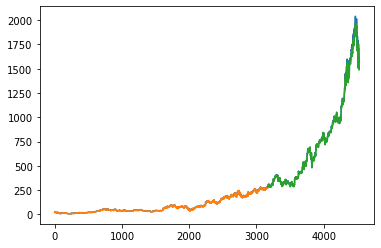

In [ ]:
plt.plot(scaler.inverse_transform(DataScaled))
plt.plot(TrainPredictPlot)
plt.plot(TestPredictPlot)
plt.show()